# Load the Dataset

## Loading the Dataset

In this step, we load the air pollution dataset using the `read_csv()` function from the pandas library.  
This allows us to read the data into a DataFrame for further analysis.


In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("Measurement_summary.csv")

# Display first few rows
df.head()


,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,0.051,0.002,1.2,69.0,61.0


# Inspect Structure, Data Types, and Missing Values

## Data Inspection

Here, we inspect the structure of the dataset to understand:
- Number of rows and columns
- Data types of each column
- Presence of missing values

This step helps identify data quality issues before analysis.


In [2]:
# Dataset structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647511 entries, 0 to 647510
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Measurement date  647511 non-null  object 
 1   Station code      647511 non-null  int64  
 2   Address           647511 non-null  object 
 3   Latitude          647511 non-null  float64
 4   Longitude         647511 non-null  float64
 5   SO2               647511 non-null  float64
 6   NO2               647511 non-null  float64
 7   O3                647511 non-null  float64
 8   CO                647511 non-null  float64
 9   PM10              647511 non-null  float64
 10  PM2.5             647511 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 54.3+ MB


In [3]:
# Statistical summary
df.describe()

,Station code,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
count,647511.000000,647511.000000,647511.000000,647511.000000,647511.000000,647511.000000,647511.000000,647511.000000,647511.000000
mean,113.000221,37.553484,126.989340,-0.001795,0.022519,0.017979,0.509197,43.708051,25.411995
std,7.211315,0.053273,0.078790,0.078832,0.115153,0.099308,0.405319,71.137342,43.924595
min,101.000000,37.452357,126.835151,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,107.000000,37.517528,126.927102,0.003000,0.016000,0.008000,0.300000,22.000000,11.000000
50%,113.000000,37.544962,127.004850,0.004000,0.025000,0.021000,0.500000,35.000000,19.000000
75%,119.000000,37.584848,127.047470,0.005000,0.038000,0.034000,0.600000,53.000000,31.000000
max,125.000000,37.658774,127.136792,3.736000,38.445000,33.600000,71.700000,3586.000000,6256.000000


In [4]:

df.columns



Index(['Measurement date', 'Station code', 'Address', 'Latitude', 'Longitude',
       'SO2', 'NO2', 'O3', 'CO', 'PM10', 'PM2.5'],
      dtype='object')

In [5]:
# Check missing values
df.isnull().sum()

Measurement date    0
Station code        0
Address             0
Latitude            0
Longitude           0
SO2                 0
NO2                 0
O3                  0
CO                  0
PM10                0
PM2.5               0
dtype: int64

# Clean and Convert Data Types

## Data Cleaning and Type Conversion

In this step, we clean the dataset by:
- Handling missing values
- Converting date/time columns to proper datetime format
- Ensuring pollutant values are numeric

Clean data ensures accurate analysis and visualization.


In [6]:
# Convert date column (example: 'date')
#df['date'] = pd.to_datetime(df['date'])
df.rename(columns={'Measurement date': 'date'}, inplace=True)
df['date'] = pd.to_datetime(df['date'])


In [7]:
# Convert pollutants to numeric
pollutants = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO']

for col in pollutants:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [8]:
# Handle missing values
df = df.dropna()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647511 entries, 0 to 647510
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date          647511 non-null  datetime64[ns]
 1   Station code  647511 non-null  int64         
 2   Address       647511 non-null  object        
 3   Latitude      647511 non-null  float64       
 4   Longitude     647511 non-null  float64       
 5   SO2           647511 non-null  float64       
 6   NO2           647511 non-null  float64       
 7   O3            647511 non-null  float64       
 8   CO            647511 non-null  float64       
 9   PM10          647511 non-null  float64       
 10  PM2.5         647511 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1), object(1)
memory usage: 54.3+ MB


# Extract Insights

## a.Top 5 Most Polluted Days

We identify the top 5 days with the highest pollution levels based on PM2.5 concentration.


In [10]:
top_5_days = df.sort_values(by='PM2.5', ascending=False).head(5)
top_5_days[['date', 'PM2.5']]


,date,PM2.5
62770,2018-04-02 16:00:00,6256.0
281354,2019-08-02 13:00:00,995.0
281426,2019-08-05 13:00:00,995.0
140880,2018-04-20 04:00:00,985.0
535694,2019-01-08 19:00:00,985.0


# b.Hourly and Monthly Pollution Trends

This analysis shows how pollution varies:
- Across different hours of the day
- Across different months of the year


In [11]:
# Extract hour 
df['hour'] = df['date'].dt.hour

hourly_trend = df.groupby('hour')['PM2.5'].mean()


hourly_trend


hour
0     24.651817
1     24.091507
2     24.103003
3     23.577686
4     23.785717
5     23.413360
6     23.788876
7     23.670649
8     24.484415
9     24.593978
10    25.433010
11    25.520666
12    25.553704
13    24.737778
14    24.870575
15    24.636552
16    26.470481
17    25.748778
18    24.546031
19    26.075595
20    25.781436
21    33.179113
22    29.401208
23    27.775472
Name: PM2.5, dtype: float64

In [12]:
# Extract  month
df['month'] = df['date'].dt.month

monthly_trend = df.groupby('month')['PM2.5'].mean()

monthly_trend

month
1     35.151950
2     32.366468
3     40.796490
4     25.538175
5     26.553208
6     24.378741
7     20.736572
8     16.215528
9     15.341071
10    15.561004
11    24.668278
12    29.124450
Name: PM2.5, dtype: float64

# c.Correlation Between Pollutants

Correlation analysis helps identify relationships between different pollutants.
A strong positive correlation suggests pollutants increase together.


In [13]:
correlation = df[pollutants].corr()
correlation


,PM2.5,PM10,NO2,SO2,CO
PM2.5,1.000000,0.228984,0.057844,0.047531,0.182867
PM10,0.228984,1.000000,0.055532,0.048573,0.151166
NO2,0.057844,0.055532,1.000000,0.712422,0.245746
SO2,0.047531,0.048573,0.712422,1.000000,0.304923
CO,0.182867,0.151166,0.245746,0.304923,1.000000


# Visualizations

## a) Histogram of Each Pollutant

### Distribution of Pollutants

Histograms are used to visualize the distribution and frequency of pollutant concentrations.


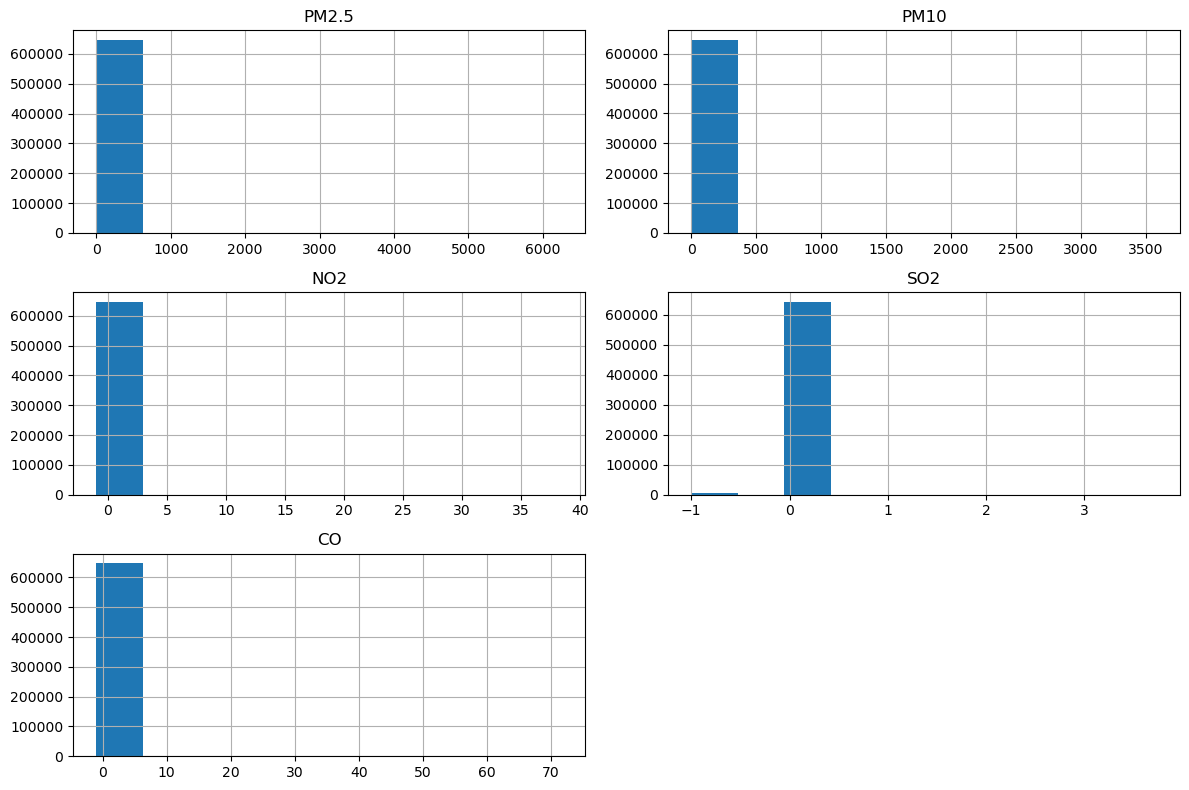

In [14]:
import matplotlib.pyplot as plt

df[pollutants].hist(figsize=(12, 8))
plt.tight_layout()
plt.show()


## b) Line Plot of Pollutant Over Time

### Pollution Trends Over Time

Line plots show how pollutant concentrations change over time, helping identify peaks and long-term trends.


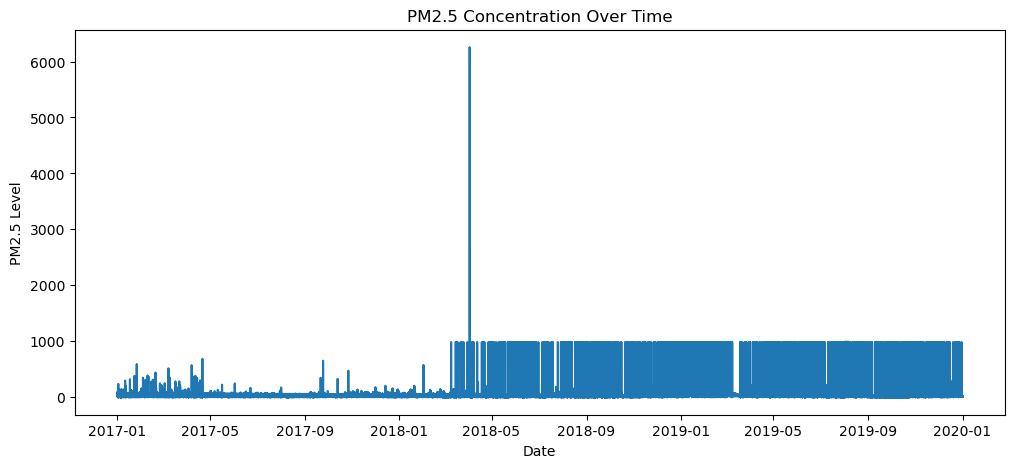

In [15]:
plt.figure(figsize=(12, 5))
plt.plot(df['date'], df['PM2.5'])
plt.xlabel("Date")
plt.ylabel("PM2.5 Level")
plt.title("PM2.5 Concentration Over Time")
plt.show()


# Conclusion

From the analysis:
- Certain days experienced extremely high pollution levels.
- Pollution shows clear hourly and monthly patterns.
- Some pollutants are strongly correlated, indicating common sources.
- Visualizations reveal periods of high pollution that may require intervention.

This analysis provides useful insights for environmental monitoring and policy planning.
